<a href="https://colab.research.google.com/github/ChandanaAasrithaPentakota/Mainflow-Internship-Tasks/blob/main/Mainflow_task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv("/disney_plus_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [22]:
df.shape


(1368, 12)

In [23]:
df.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [24]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df.head())

  show_id  type  title  director  cast  country  date_added  release_year  \
0      s1     0     17       242    60       87         145          2021   
1      s2     0    980       459  1072       48         145          2011   
2      s3     0   1085       290   952       43         145          2014   
3      s4     1    316       549   713       43         144          2019   
4      s5     1    978       549    88       43         144          2021   

   rating  duration  listed_in  description  
0       5       142        254         1242  
1       0       149        212         1156  
2       2        32        233          652  
3       5        70         85          828  
4       6         0         14         1046  


In [25]:
df.shape

(1368, 12)

In [26]:
df1=df

In [27]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgjxof207/4ziwy7n_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgjxof207/a732n19_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82806', 'data', 'file=/tmp/tmpgjxof207/4ziwy7n_.json', 'init=/tmp/tmpgjxof207/a732n19_.json', 'output', 'file=/tmp/tmpgjxof207/prophet_modeld1h4fj5j/prophet_model-20240614150426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:26 - cmdstanpy - INFO - Chain

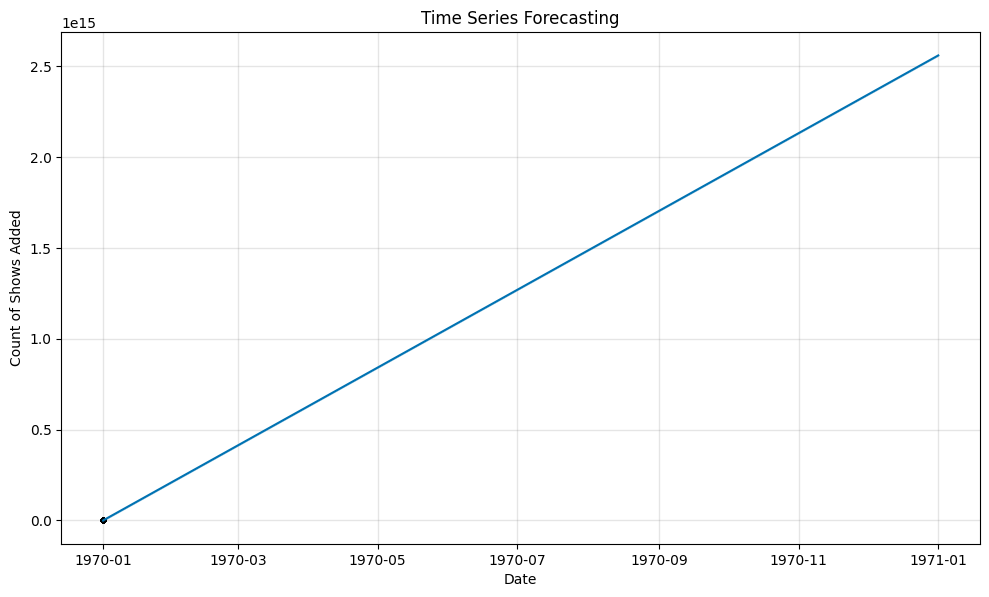

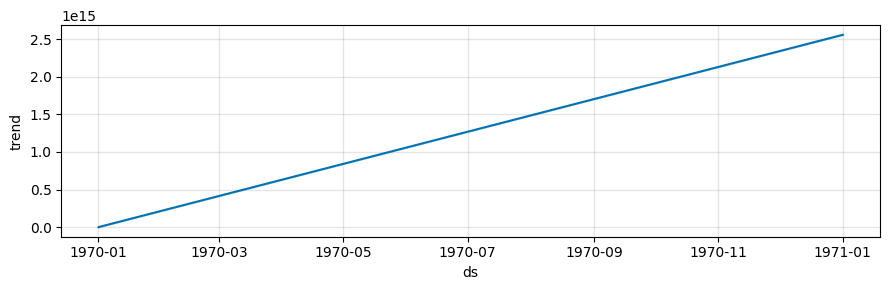

In [28]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['count'] = 1
df = df.groupby('date_added').count().reset_index()
df = df.rename(columns={'date_added': 'ds', 'count': 'y'})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)  # Forecast for 1 year
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title("Time Series Forecasting")
plt.xlabel("Date")
plt.ylabel("Count of Shows Added")
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

In [29]:
pip install pandas nltk vaderSentiment

In [30]:
import pandas as pd
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [31]:
df=pd.read_csv("/disney_plus_titles.csv")
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the description column
df['sentiment'] = df['description'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify the sentiment as positive, negative, or neutral
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Display the dataframe with sentiment analysis results
print(df[['description', 'sentiment', 'sentiment_class']])

                                            description  sentiment  \
0     Two Pixar filmmakers strive to bring their uni...     0.2263   
1     The puppies go on a spooky adventure through a...    -0.2023   
2     Hazel and Gus share a love that sweeps them on...     0.7506   
3     Matt Beisner uses unique approaches to modifyi...     0.0000   
4     Spidey teams up with pals to become The Spidey...     0.0000   
...                                                 ...        ...   
1363  Merlin trains a young orphan who's destined to...     0.0000   
1364  A strong-willed family struggles to establish ...    -0.3612   
1365   Welcome to Kirby's world! It's rude and sketchy.     0.0000   
1366  Ryan discovers his ability to control a giant ...     0.3182   
1367  Rock out with the Imagination Movers, Disney J...     0.5093   

     sentiment_class  
0           positive  
1           negative  
2           positive  
3            neutral  
4            neutral  
...              ... 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
df=df1
df.fillna('Unknown', inplace=True)
label_encoders = {}
categorical_columns = ['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to avoid issues with None
    label_encoders[col] = le
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[categorical_columns])
print("K-means Clustering:")
print(df[['show_id', 'cluster']])
X = df.drop(columns=['show_id', 'type', 'cluster'])
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classification Accuracy: {accuracy:.2f}")
df['predicted_type'] = clf.predict(X)
print("\nDataframe with Predicted Types:")
print(df[['show_id', 'type', 'predicted_type', 'cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Clustering:
     show_id  cluster
0         s1        1
1         s2        0
2         s3        1
3         s4        1
4         s5        2
...      ...      ...
1363   s1364        2
1364   s1365        2
1365   s1366        1
1366   s1367        1
1367   s1368        1

[1368 rows x 2 columns]
Random Forest Classification Accuracy: 0.99

Dataframe with Predicted Types:
     show_id  type  predicted_type  cluster
0         s1     0               0        1
1         s2     0               0        0
2         s3     0               0        1
3         s4     1               1        1
4         s5     1               1        2
...      ...   ...             ...      ...
1363   s1364     0               0        2
1364   s1365     0               0        2
1365   s1366     1               1        1
1366   s1367     1               1        1
1367   s1368     1               1        1

[1368 rows x 4 columns]
